In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import random

In [2]:
import sklearn.preprocessing as skp

In [3]:
import sklearn.decomposition

In [4]:
# DO NOT EDIT
def majority_vote_fast(votes):
    mode, count = ss.mstats.mode(votes)
    return mode

def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote_fast(outcomes[ind])[0]

In [5]:
filepath = "./Homework/wine.csv"
wine = pd.read_csv(filepath,index_col=0)

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [7]:
wine["is_red"] = (wine["color"] == "red")
wine = wine.astype({"is_red":"int64"})

In [8]:
sum(wine["is_red"])

1599

In [9]:
numeric_data = wine.drop("color", axis=1)

In [10]:
scaled_data = skp.scale(numeric_data)

In [11]:
numeric_data = pd.DataFrame(scaled_data)

In [12]:
columns = numeric_data.columns

In [13]:
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit(numeric_data).transform(numeric_data)
""""fit" computes the mean and std to be used for later scaling. (jsut a computation), nothing is given to you.
"transform" uses a previously computed mean and std to autoscale the data (subtract mean from all values and then divide it by std). 
"fit_transform" does both at the same time"""

"""Principal Component Analysis, or PCA, is a dimensionality-reduction method
that is often used to reduce the dimensionality of large data sets,
by transforming a large set of variables into a smaller one that still contains most of the information in the large set"""

'Principal Component Analysis, or PCA, is a dimensionality-reduction method\nthat is often used to reduce the dimensionality of large data sets,\nby transforming a large set of variables into a smaller one that still contains most of the information in the large set'

In [14]:
principal_components.shape

(6497, 2)

In [15]:
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages

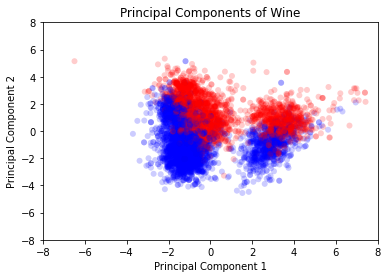

In [19]:
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:,0]
y = principal_components[:,1]

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = wine['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("wine_plot.pdf")
plt.show()

In [24]:
"""def accuracy(predictions, outcomes):
    for i in predictions:
        for j in outcomes:
            if i==j:
                Percentage =np.mean(predictions == outcomes)
    return (Percentage*100) """
def accuracy(predictions, outcomes):
    return 100*np.mean(predictions == outcomes)

In [25]:
np.random.seed(1)
x = np.random.randint(0, 2, 1000)
y = np.random.randint(0 ,2, 1000)

In [26]:
prediction = accuracy(x,y)

In [27]:
prediction

51.5

In [28]:
no_low_wine = accuracy(0,wine["high_quality"])

In [29]:
no_low_wine

36.69385870401724

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, wine['high_quality'])
library_predictions = knn.predict(numeric_data)

In [32]:
predictions_accuracy = accuracy(library_predictions, wine["high_quality"])
print(predictions_accuracy)

99.96921656148992


In [33]:
n_rows = wine.shape[0]
random.seed(123)
selection = random.sample(range(n_rows), 10)

In [34]:
selection

[428, 2192, 714, 6299, 3336, 2183, 882, 312, 3105, 4392]